In [ ]:
!pip install biopython

     |████████████████████████████████| 2.3MB 2.7MB/s 


In [ ]:
from google.colab import drive
import re

In [ ]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [31]:
import numpy as np
import re
def string_to_array(my_string):
    my_string = my_string.lower()
    my_string = re.sub('[^acgt]', 'z', my_string)
    my_array = np.array(list(my_string))
    return my_array

# create a label encoder with 'acgtn' alphabet

In [32]:
from sklearn.preprocessing import LabelEncoder
def ordinal_encoder(my_array):
    label_encoder = LabelEncoder()
    label_encoder.fit(np.array(['a','c','g','t','z']))
    integer_encoded = label_encoder.transform(my_array)
    float_encoded = integer_encoded.astype(float)
    float_encoded[float_encoded == 0] = 0 # A
    float_encoded[float_encoded == 1] = 1 # C
    float_encoded[float_encoded == 2] = 2 # G
    float_encoded[float_encoded == 3] = 3 # T
    float_encoded[float_encoded == 4] = 4 # anything else, z
    return float_encoded

In [33]:
from sklearn.preprocessing import OneHotEncoder
def one_hot_encoder(my_array):
    integer_encoded = label_encoder.transform(my_array)
    onehot_encoder = OneHotEncoder(sparse=False, dtype=int, n_values=5)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    onehot_encoded = np.delete(onehot_encoded, -1, 1)
    return onehot_encoded
def glcm(m_array):
  a=np.amax(m_array)
  a=int(a)
  template=np.zeros((a+1,a+1))
  for i in range(m_array.shape[0]):
    for j in range(m_array.shape[1]-1):
      if m_array[i][j]!=-1. and m_array[i][j+1]!=-1.:
        template[int(m_array[i][j])][int(m_array[i][j+1])]+=1
  return template
def glcm_vect(m_array):
  template=np.zeros((4,4))
  for i in range(m_array.shape[0]-1):
    template[int(m_array[i])][int(m_array[i+1])]+=1
  return template
                 
def contrast(matriz_g):
  resultado=0
  for i in range(matriz_g.shape[0]):
    for j in range(matriz_g.shape[1]):
      resultado+=((i-j)**2)*matriz_g[i][j]
  return resultado
def energy(matriz_g):
  resultado=0
  for i in range(matriz_g.shape[0]):
    for j in range(matriz_g.shape[1]):
      resultado+=matriz_g[i][j]
  return resultado
def entropy(matriz_g):
  a=np.log(matriz_g)
  resultado=np.sum(a)
  return resultado

In [34]:
from skimage.feature import greycomatrix, greycoprops
from multiprocessing import Pool
def glcm_props(patch):
    lf = []
    props = ['entropy', 'contrast', 'homogeneity', 'energy', 'correlation']

    #para que vaya a la derecha np.pi/4
    glcm = greycomatrix(patch, [1], [np.pi/4], 256, symmetric=True, normed=True)
    for f in props:
        lf.append( greycoprops(glcm, f)[0,0] )
      
    a=[]
    for f in props:
        a.append( greycoprops(glcm, f)[0,0] )
    return a


In [35]:
from Bio import SeqIO
data=[]
for seq_record in SeqIO.parse('/content/drive/My Drive/molecular/example.fa', "fasta"):
    a=str(seq_record.seq)
    montar=string_to_array(a)
    montar=ordinal_encoder(montar)
    ggg=np.array(montar)
    m_glcm=glcm_vect(ggg)
    a=[]
    if int(ggg.shape[0]%4)!=0:
      new_cont=(int(ggg.shape[0]//4)+1)*4
      a=np.zeros(int(new_cont-ggg.shape[0]))
    ggg=np.append(ggg,a)
    f=ggg.shape[0]
    gope =np.array(ggg).reshape(int(f/4),4)
    a=glcm(gope)
    a=a.astype(np.uint8)
    gope=gope.astype(np.uint8)
    data.append(glcm_props(gope))
for seq_record in SeqIO.parse('/content/drive/My Drive/molecular/Macaca_fascicularis_chromosome10.fa', "fasta"):
    a=str(seq_record.seq)
    montar=string_to_array(a)
    montar=ordinal_encoder(montar)
    ggg=np.array(montar)
    #m_glcm=glcm_vect(ggg)
    a=[]
    if int(ggg.shape[0]%4)!=0:
      new_cont=(int(ggg.shape[0]//4)+1)*4
      a=np.zeros(int(new_cont-ggg.shape[0]))
    ggg=np.append(ggg,a)
    f=ggg.shape[0]
    gope =np.array(ggg).reshape(int(f/4),4)
    a=glcm(gope)
    a=a.astype(np.uint8)
    gope=gope.astype(np.uint8)
    data.append(glcm_props(gope))
print(data)

[[1.2577319587628866, 2.4192439862542954, 0.4872852233676976, 0.2569058926675693, 0.07525639173768602], [1.2633209417596036, 2.54089219330855, 0.496096654275093, 0.25097105226920463, 0.02238156592755131], [1.179117857436832, 2.453041014963959, 0.5378208711397129, 0.2448337280756407, 0.2377882445583145]]


In [40]:
for seq_record in SeqIO.parse('/content/drive/My Drive/molecular/Macaca_mulatta_nonchromosomal.fa', "fasta"):
    a=str(seq_record.seq)
    montar=string_to_array(a)
    montar=ordinal_encoder(montar)
    ggg=np.array(montar)
    #m_glcm=glcm_vect(ggg)
    a=[]
    if int(ggg.shape[0]%4)!=0:
      new_cont=(int(ggg.shape[0]//4)+1)*4
      a=np.zeros(int(new_cont-ggg.shape[0]))
    ggg=np.append(ggg,a)
    f=ggg.shape[0]
    gope =np.array(ggg).reshape(int(f/4),4)
    a=glcm(gope)
    a=a.astype(np.uint8)
    gope=gope.astype(np.uint8)
    data.append(glcm_props(gope))

In [43]:
for seq_record in SeqIO.parse('/content/drive/My Drive/molecular/Microcebus_murinus_chromosome.17.fa', "fasta"):
    a=str(seq_record.seq)
    montar=string_to_array(a)
    montar=ordinal_encoder(montar)
    ggg=np.array(montar)
    #m_glcm=glcm_vect(ggg)
    a=[]
    if int(ggg.shape[0]%4)!=0:
      new_cont=(int(ggg.shape[0]//4)+1)*4
      a=np.zeros(int(new_cont-ggg.shape[0]))
    ggg=np.append(ggg,a)
    f=ggg.shape[0]
    gope =np.array(ggg).reshape(int(f/4),4)
    a=glcm(gope)
    a=a.astype(np.uint8)
    gope=gope.astype(np.uint8)
    data.append(glcm_props(gope))

In [45]:
for seq_record in SeqIO.parse('/content/drive/My Drive/molecular/Pongo_abelii_chromosome.21.fa', "fasta"):
    a=str(seq_record.seq)
    montar=string_to_array(a)
    montar=ordinal_encoder(montar)
    ggg=np.array(montar)
    #m_glcm=glcm_vect(ggg)
    a=[]
    if int(ggg.shape[0]%4)!=0:
      new_cont=(int(ggg.shape[0]//4)+1)*4
      a=np.zeros(int(new_cont-ggg.shape[0]))
    ggg=np.append(ggg,a)
    f=ggg.shape[0]
    gope =np.array(ggg).reshape(int(f/4),4)
    a=glcm(gope)
    a=a.astype(np.uint8)
    gope=gope.astype(np.uint8)
    data.append(glcm_props(gope))

In [47]:
for seq_record in SeqIO.parse('/content/drive/My Drive/molecular/chr3_GL000221v1_random.subst.fa', "fasta"):
    a=str(seq_record.seq)
    montar=string_to_array(a)
    montar=ordinal_encoder(montar)
    ggg=np.array(montar)
    #m_glcm=glcm_vect(ggg)
    a=[]
    if int(ggg.shape[0]%4)!=0:
      new_cont=(int(ggg.shape[0]//4)+1)*4
      a=np.zeros(int(new_cont-ggg.shape[0]))
    ggg=np.append(ggg,a)
    f=ggg.shape[0]
    gope =np.array(ggg).reshape(int(f/4),4)
    a=glcm(gope)
    a=a.astype(np.uint8)
    gope=gope.astype(np.uint8)
    data.append(glcm_props(gope))

In [55]:
for seq_record in SeqIO.parse('/content/drive/My Drive/molecular/Gorilla_gorilla_chromosome.1.fa', "fasta"):
    a=str(seq_record.seq)
    montar=string_to_array(a)
    montar=ordinal_encoder(montar)
    ggg=np.array(montar)
    #m_glcm=glcm_vect(ggg)
    a=[]
    if int(ggg.shape[0]%4)!=0:
      new_cont=(int(ggg.shape[0]//4)+1)*4
      a=np.zeros(int(new_cont-ggg.shape[0]))
    ggg=np.append(ggg,a)
    f=ggg.shape[0]
    gope =np.array(ggg).reshape(int(f/4),4)
    a=glcm(gope)
    a=a.astype(np.uint8)
    gope=gope.astype(np.uint8)
    data.append(glcm_props(gope))

Text(0.5, 0, 'entropy')

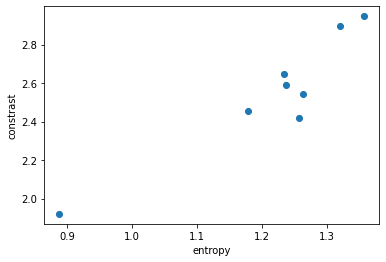

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
lista=['entropy', 'contrast', 'homogeneity', 'energy', 'correlation']
entropia=[]
contrast=[]
homogeneity=[]
energy=[]
correlation=[]
for i in range(len(data)):
  entropia.append(data[i][0])
  contrast.append(data[i][1])
  homogeneity.append(data[i][2])
  energy.append(data[i][3])
  correlation.append(data[i][4])

ax.scatter(entropia,contrast, c='green', label='green',
               alpha=0.5, edgecolors='none')
plt.scatter(entropia,contrast)
plt.ylabel("constrast")
plt.xlabel("entropy")

Text(0, 0.5, 'energy')

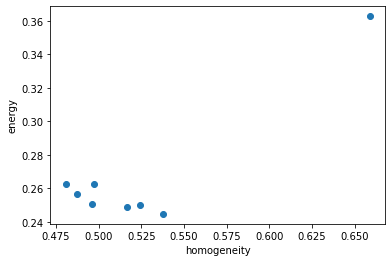

In [58]:
plt.scatter(homogeneity,energy)
plt.xlabel("homogeneity")
plt.ylabel("energy")

Text(0.5, 0, 'contrast')

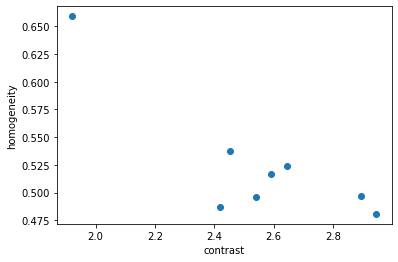

In [60]:
plt.scatter(contrast,homogeneity)
plt.ylabel("homogeneity")
plt.xlabel("contrast")